In [1]:
import numpy as np
from tqdm import tqdm

m_1 = 1
m_2 = 0.2
c = 1
omega = 1

In [2]:
particles_num = np.arange(-100, 100, 1)
particles_mass = np.array([m_1 if i < 0 else m_2 for i in particles_num])
particles_disp = np.array([0]*len(particles_num), dtype=float)
particles_vel = np.array([0]*len(particles_num), dtype=float)

In [3]:
del_t = 0.005
times = np.arange(0, 190, del_t)

In [4]:
#particles_history = np.zeros(shape=(1,len(particles_num)))

for t in tqdm(times):
    for p in particles_num:
        ind = np.where(particles_num == p)[0][0]
        if ind == 0:
            particles_disp[ind] = np.sin(omega*t)
            particles_vel[ind] = np.cos(omega*t)
        elif ind == len(particles_num) - 1:
            particles_vel[ind] += c/particles_mass[ind]*(particles_disp[ind-1]-2*particles_disp[ind])*del_t
            particles_disp[ind] += particles_vel[ind] * del_t
        else:
            particles_vel[ind] += c/particles_mass[ind]*(particles_disp[ind-1]+particles_disp[ind+1]-2*particles_disp[ind])*del_t
            particles_disp[ind] += particles_vel[ind] * del_t
    #particles_history = np.vstack((particles_history, particles_disp))

100%|██████████| 38000/38000 [00:28<00:00, 1342.60it/s]


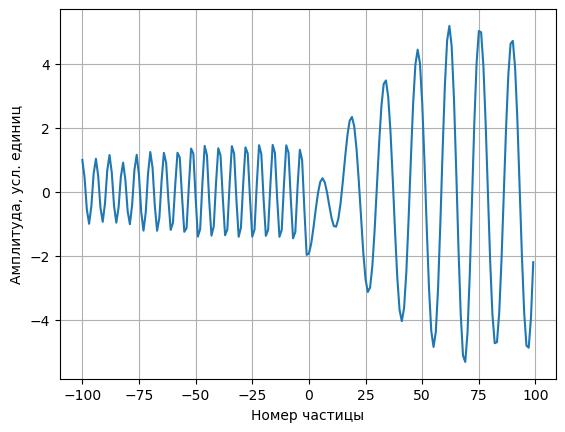

In [5]:
import matplotlib.pyplot as plt

plt.plot(particles_num, particles_disp)
plt.xlabel('Номер частицы')
plt.ylabel('Амплитуда, усл. единиц')
plt.grid()

In [6]:
#plt.plot(particles_history[:,40])